<a href="https://colab.research.google.com/github/Khalid-Rafiq-01/Image-Segmentation-Pets-Datset/blob/main/Test_on_FAIR_Images_ReSize_Vs_Patches_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testing an image online-
**Downloading the image and performing the necessary pre-processing**

*Improrting the necessary libraries*

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

*Downloading images from web (deliberately choose a HR image) -- Images from FAIR Segment Anything Model* 

In [ ]:
! wget "https://segment-anything.com/assets/gallery/dogs-with-stick.jpg"
! wget "https://image.winudf.com/v2/image/Y29tLmZyZWUud2FsbHBhcGVycy5hbmltYWwuaGRfc2NyZWVuc2hvdHNfMF83ZDg4N2UxYQ/screen-0.jpg?fakeurl=1&type=.jpg"
! wget "https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg"
! wget "https://segment-anything.com/assets/gallery/GettyImages-587358024.jpg"

--2023-04-14 11:56:17--  https://segment-anything.com/assets/gallery/dogs-with-stick.jpg
Resolving segment-anything.com (segment-anything.com)... 108.156.83.10, 108.156.83.50, 108.156.83.58, ...
Connecting to segment-anything.com (segment-anything.com)|108.156.83.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448722 (438K) [image/jpeg]
Saving to: ‘dogs-with-stick.jpg’

dogs-with-stick.jpg 100%[===================>] 438.21K  --.-KB/s    in 0.1s    

2023-04-14 11:56:17 (4.18 MB/s) - ‘dogs-with-stick.jpg’ saved [448722/448722]

--2023-04-14 11:56:17--  https://image.winudf.com/v2/image/Y29tLmZyZWUud2FsbHBhcGVycy5hbmltYWwuaGRfc2NyZWVuc2hvdHNfMF83ZDg4N2UxYQ/screen-0.jpg?fakeurl=1&type=.jpg
Resolving image.winudf.com (image.winudf.com)... 104.26.9.22, 172.67.68.182, 104.26.8.22, ...
Connecting to image.winudf.com (image.winudf.com)|104.26.9.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189332 (185K) [image/jpeg]
Saving to: ‘screen

In [ ]:
img_path_1 = '/content/dogs-with-stick.jpg'
img_path_2 = '/content/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg'
img_path_3 = '/content/screen-0.jpg?fakeurl=1&type=.jpg'
img_path_4 = '/content/GettyImages-587358024.jpg'

In [ ]:
# Let us create a small function that takes in image path, reads it and normalizes the data:
def img_preprocess(img_path):
  img = cv2.imread(img_path)
  img = img/255
  return img

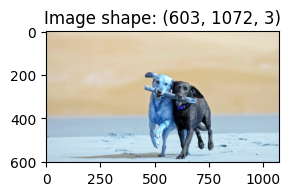

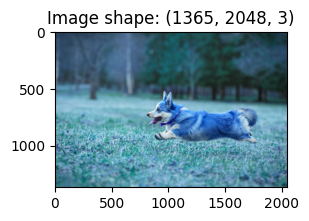

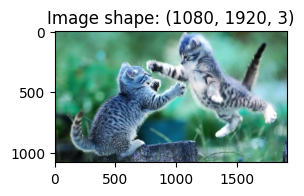

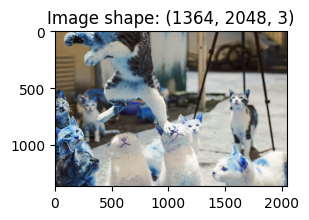

In [ ]:
# Reading the loaded images and 
img_1 = img_preprocess(img_path_1)
img_2 = img_preprocess(img_path_2)
img_3 = img_preprocess(img_path_3)
img_4 = img_preprocess(img_path_4)

img_list = [img_1, img_2, img_3, img_4]
for image in img_list:
  plt.figure(figsize=(3,3))
  plt.imshow(image)
  plt.title(f'Image shape: {image.shape}')


*The model is trained on images containing single animals at once, but the hypothesis is that since the patches capture small scale features (parts of face, legs etc.) instead of the entire image, it would not matter if there are multiple cats in the image, or combination of cats and dogs*

**Actually even without the patches, it will segment more than one pet. This clearly shows "a segmentation task is simply a classification task of each pixel".**

*Developing the same input structure as expected by the trained DL model! Creating patches of (256, 256, 3) from the input image*

In [ ]:
# Define the patch size of 256
patch_size = 256
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from patchify import patchify

In [ ]:
# Function called block_tiles; takes in images and patch size; returns tiles with dim that are multiples of image dim.
def block_tiles(image_or_mask, visualize):
  size_x = (image_or_mask.shape[1]//patch_size)*patch_size # integral multiple of patch_size
  size_y = (image_or_mask.shape[0]//patch_size)*patch_size # integral multiple of patch_size
  # Slicing operation to crop out the image:

  if len(image_or_mask.shape) == 3:
    cropped_image = image_or_mask[0:size_y, 0:size_x,:]
    tile_size = (patch_size, patch_size, 3)
    tiles = patchify(image_or_mask, tile_size, step = tile_size) # creating patches/tiles from the large image:
  else:
    cropped_image = image_or_mask[0:size_y, 0:size_x]
    tile_size = (patch_size, patch_size)
    tiles = patchify(image_or_mask, tile_size, step = tile_size) # creating patches/tiles from the large image:

 # Visualization:
  if visualize == 'on': # Used to visualize the tiles/patches 
      tile_visualize(tiles)
  elif visualize == 'off':
      pass
  return tiles

In [ ]:
# Visualizing the tiles(masks/images):
def tile_visualize(tiles):
  n_y = tiles.shape[0]
  n_x = tiles.shape[1]
  
  fig, axs = plt.subplots(n_y, n_x, figsize=(8, 6))
  if n_y == 1 or n_x == 1:  # Only if one row or one column of images is possible
    axs = axs.reshape(-1)
    for i in range(n_y):
      for j in range(n_x):
        tile_patch = tiles[i, j, 0]
        axs[i * n_x + j].imshow(tile_patch)
        axs[i * n_x + j].axis('off')

  if n_x*n_y > 2:
    for i in range(n_y):
      for j in range(n_x):
        axs[i,j].imshow(tiles[i,j,0])
        axs[i,j].axis('off')

  plt.show()

*Applying the patch function on the input image*

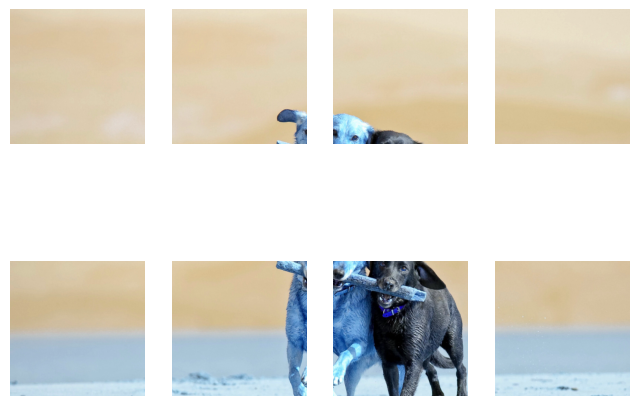

In [ ]:
# Applying the above functions on our Internet test image:
# We will only visualize the first image patches 
tiles_1 = block_tiles(img_1, visualize='on')
tiles_2 = block_tiles(img_2, visualize='off')
tiles_3 = block_tiles(img_3, visualize='off')
tiles_4 = block_tiles(img_4, visualize='off')


In [ ]:
# Let us create a for loop that akes in images from the above list and then applies block_tiles functon over it:
tiles = []
for image in img_list:
  img_tiles = block_tiles(image, visualize='off')
  tiles.append(img_tiles)


In [ ]:
# Let us display the shape of the tiles:
for i in range(len(tiles)):
  print(f'Shape of the the patched tiles for image {i+1} is: {tiles[i].shape}')

Shape of the the patched tiles for image 1 is: (2, 4, 1, 256, 256, 3)
Shape of the the patched tiles for image 2 is: (5, 8, 1, 256, 256, 3)
Shape of the the patched tiles for image 3 is: (4, 7, 1, 256, 256, 3)
Shape of the the patched tiles for image 4 is: (5, 8, 1, 256, 256, 3)


*Reshaping the tiles to make them in the format as expected by the trained model*

In [ ]:
# Let us reshape the tiles to the shape as required for the model:
reshaped_tiles = []
for i in range(len(tiles)):
  each_reshaped_tile = np.reshape(tiles[i], (-1, 256, 256,3))
  reshaped_tiles.append(each_reshaped_tile)

#Let us check the shapes of the reshaped tiles:
for i in range(len(tiles)):
  print(f'The shape of the reshaped tiles {i+1} is: {reshaped_tiles[i].shape}')

The shape of the reshaped tiles 1 is: (8, 256, 256, 3)
The shape of the reshaped tiles 2 is: (40, 256, 256, 3)
The shape of the reshaped tiles 3 is: (28, 256, 256, 3)
The shape of the reshaped tiles 4 is: (40, 256, 256, 3)


**Define a function which takes in the entire batch of predicted masks and returns the re-assembled overall mask**

In [ ]:
def reassemble_image(dataset, n_rows, n_cols):
    # Check if the dataset can be reassembled with the given number of rows and columns
    assert dataset.shape[0] == n_rows * n_cols, "Dataset cannot be reassembled with the given number of rows and columns"

    # Reshape the dataset to have 4 dimensions (if it's not already in that shape)
    if len(dataset.shape) == 4:
        dataset = np.expand_dims(dataset, axis=-1)

    # Calculate the shape of each patch
    patch_shape = dataset.shape[1:3]

    # Concatenate patches along the columns to form each row
    rows = []
    for i in range(n_rows):
        row_start = i * n_cols
        row_end = (i + 1) * n_cols
        row = np.concatenate(dataset[row_start:row_end], axis=1)
        rows.append(row)

    # Concatenate rows along the rows to form the final image
    assembled_image = np.concatenate(rows, axis=0)

    return assembled_image


#Loading models trained on patched images:
**Small ResNet34 Model (trained on ~ 1570 Patches of (256, 256, 3)*

**Large ResNet34 Model (trained on ~ 5500 Patches of (256, 256, 3)*

**Large EfficientNetB7 Model (trained on ~ 5500 Patches of (256, 256, 3)*

**Trained EfficientNet models are called for inference in a different way than the ResNet Models**

In [ ]:
from keras.models import load_model
import tensorflow_hub as hub

In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import efficientnet.keras as efn

In [ ]:
#Defining the path of the trained deep-learning models: 
resnet34_small_path = ('/content/drive/MyDrive/Trained Model/Tiles size 256/block_tile_resnet34_small (1).h5')
resnet34_large_path = ('/content/drive/MyDrive/Trained Model/Tiles size 256/block_tile_resnet34_full (1).h5')
efb7_path = ('/content/drive/MyDrive/Trained Model/Tiles size 256/tile_b7_sm_model_frozen (1).h5')

In [ ]:
#Loading the deeplearing models into the working env
resnet34_small_model = load_model(resnet34_small_path)
resnet34_large_model = load_model(resnet34_large_path)
efb7_model = load_model(efb7_path)

*Let us define a function which takes in the model name and returns assembled predicted masks*

In [ ]:
# Let us predict the individual masks and assemble them to form the larger mask
predicted_masks_resnet34_small = []
for i in range(len(tiles)):
  pred_masks = resnet34_small_model.predict(reshaped_tiles[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  mask_1 = reassemble_image(pred_masks_1, (tiles[i].shape)[0], (tiles[i].shape)[1])
  predicted_masks_resnet34_small.append(mask_1)

# Let us predict the individual masks and assemble them to form the larger mask
predicted_masks_resnet34_large = []
for i in range(len(tiles)):
  pred_masks = resnet34_large_model.predict(reshaped_tiles[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  mask_1 = reassemble_image(pred_masks_1, (tiles[i].shape)[0], (tiles[i].shape)[1])
  predicted_masks_resnet34_large.append(mask_1)

# Let us predict the individual masks and assemble them to form the larger mask
predicted_masks_efb7 = []
for i in range(len(tiles)):
  pred_masks = efb7_model.predict(reshaped_tiles[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  mask_1 = reassemble_image(pred_masks_1, (tiles[i].shape)[0], (tiles[i].shape)[1])
  predicted_masks_efb7.append(mask_1)


2/2 [==============================] - 39s 8s/step


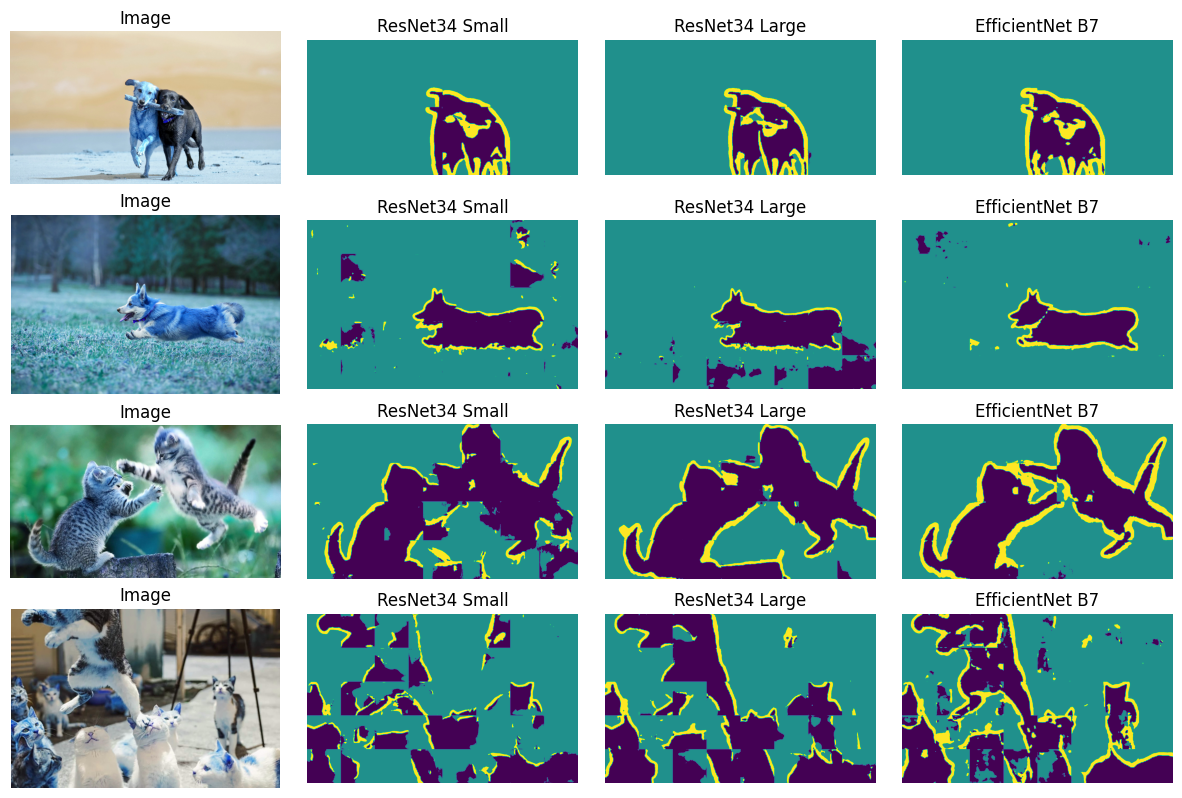

In [ ]:
# Create a 1-row, 2-column subplot grid with a fixed size
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# Plotting the image on the LHS and the corroponding assembled predicted mask on the RHS!
for i in range(4):
  axes[i,0].imshow(img_list[i])
  axes[i,0].set_title('Image')
  axes[i,0].axis('off')

  axes[i,1].imshow(predicted_masks_resnet34_small[i])
  axes[i,1].set_title('ResNet34 Small')
  axes[i,1].axis('off')

  axes[i,2].imshow(predicted_masks_resnet34_large[i])
  axes[i,2].set_title('ResNet34 Large')
  axes[i,2].axis('off')

  axes[i,3].imshow(predicted_masks_efb7[i])
  axes[i,3].set_title('EfficientNet B7')
  axes[i,3].axis('off')

# Adjust the size and spacing of the subplots
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show the plot
plt.show()

#Loading models trained on reshaped images:
**ResNet18 Model*

**ResNet34 Model*

**EfficientNetB3 Model*

*Let us create a function that takes in image path, reads it and normalizes the data and resizes it to shape expected by the deep learning  model*

In [ ]:
def img_resizing(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (256,256))
  req_img = img/255
  img = tf.expand_dims(req_img, axis = 0)
  # Let us take a slice of this EagerTensor and convert it to tensorflow dataset object of batchsize 1:
  img = tf.data.Dataset.from_tensor_slices(img)
  #Creating a batch containing single element
  img_tensor = img.batch(batch_size=1)
  return req_img, img_tensor

In [ ]:
# Reading the loaded images and 
req_img_1, img_tensor_1  = img_resizing(img_path_1)
req_img_2, img_tensor_2  = img_resizing(img_path_2)
req_img_3, img_tensor_3  = img_resizing(img_path_3)
req_img_4, img_tensor_4  = img_resizing(img_path_4)

img_list = [req_img_1, req_img_2, req_img_3, req_img_4]
img_list_tensor = [img_tensor_1, img_tensor_2, img_tensor_3, img_tensor_4]

In [ ]:
# Defining the path of different pretrained models trained on reshaped images:
resnet18_reshaped_path = '/content/drive/MyDrive/Trained Model/Reshaped Pretrained Models/reshape_resnet18.h5'
resnet34_reshaped_path = '/content/drive/MyDrive/Trained Model/Reshaped Pretrained Models/reshape_resnet34.h5'
effb3_reshaped_path = '/content/drive/MyDrive/Trained Model/Reshaped Pretrained Models/reshape_efficientnetb3.h5'
vgg16_reshaped_path = '/content/drive/MyDrive/Trained Model/Reshaped Pretrained Models/DL4AI_PretrainedModels/pets_segmentation_VGG16_img256.h5'
vgg19_reshaped_path = '/content/drive/MyDrive/Trained Model/Reshaped Pretrained Models/DL4AI_PretrainedModels/pets_segmentation_VGG19_img256 (3).h5'
mobilenet_path = '/content/drive/MyDrive/Trained Model/Reshaped Pretrained Models/DL4AI_PretrainedModels/pets_segmentation_MobileNet_img256 (4).h5'


*Loading the different models*

In [ ]:
resnet18_reshaped_model = load_model(resnet18_reshaped_path)
resnet34_reshaped_model = load_model(resnet34_reshaped_path)
effb3_reshaped_model = load_model(effb3_reshaped_path)
vgg16_model = load_model(vgg16_reshaped_path)
vgg19_model = load_model(vgg19_reshaped_path)
mobilenet_model = load_model(mobilenet_path)

*Predicting the masks from the above trained models:*

In [ ]:
predicted_masks_resnet18_reshape = []
for i in range(len(tiles)):
  pred_masks = resnet18_reshaped_model.predict(img_list_tensor[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  pred_masks_2 = np.squeeze(pred_masks_1, axis = 0)
  pred_masks_2 = pred_masks_2.astype('uint8')
  pred_masks_2 = cv2.resize(pred_masks_2, (1920,1080))
  predicted_masks_resnet18_reshape.append(pred_masks_2)

predicted_masks_resnet34_reshape = []
for i in range(len(tiles)):
  pred_masks = resnet34_reshaped_model.predict(img_list_tensor[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  pred_masks_2 = np.squeeze(pred_masks_1, axis = 0)
  pred_masks_2 = pred_masks_2.astype('uint8')
  pred_masks_2 = cv2.resize(pred_masks_2, (1920,1080))
  predicted_masks_resnet34_reshape.append(pred_masks_2)

effb3_reshape = []
for i in range(len(tiles)):
  pred_masks = effb3_reshaped_model.predict(img_list_tensor[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  pred_masks_2 = np.squeeze(pred_masks_1, axis = 0)
  pred_masks_2 = pred_masks_2.astype('uint8')
  pred_masks_2 = cv2.resize(pred_masks_2, (1920,1080))
  effb3_reshape.append(pred_masks_2)

predicted_masks_vgg16 = []
for i in range(len(tiles)):
  pred_masks = vgg16_model.predict(img_list_tensor[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  pred_masks_2 = np.squeeze(pred_masks_1, axis = 0)
  pred_masks_2 = pred_masks_2.astype('uint8')
  pred_masks_2 = cv2.resize(pred_masks_2, (1920,1080))
  predicted_masks_vgg16.append(pred_masks_2)

predicted_masks_vgg19 = []
for i in range(len(tiles)):
  pred_masks = vgg19_model.predict(img_list_tensor[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  pred_masks_2 = np.squeeze(pred_masks_1, axis = 0)
  pred_masks_2 = pred_masks_2.astype('uint8')
  pred_masks_2 = cv2.resize(pred_masks_2, (1920,1080))
  predicted_masks_vgg19.append(pred_masks_2)

predicted_masks_mobilenet = []
for i in range(len(tiles)):
  pred_masks = mobilenet_model.predict(img_list_tensor[i])
  pred_masks_1 = np.argmax(pred_masks, axis = 3)
  pred_masks_2 = np.squeeze(pred_masks_1, axis = 0)
  pred_masks_2 = pred_masks_2.astype('uint8')
  pred_masks_2 = cv2.resize(pred_masks_2, (1920,1080))
  predicted_masks_mobilenet.append(pred_masks_2)

1/1 [==============================] - 0s 107ms/step


**Visualizing the results from the 6 reshaped models**

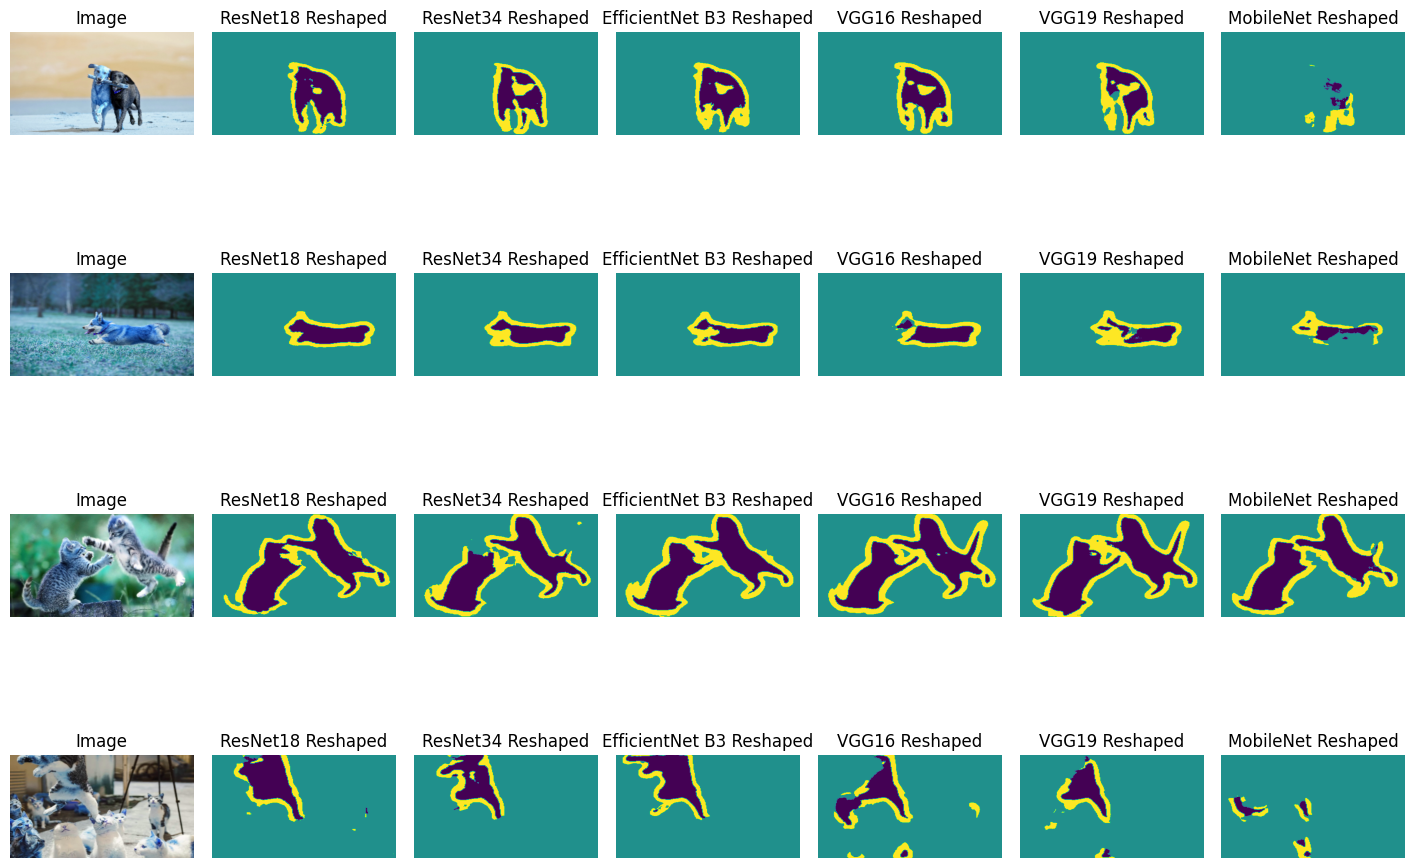

In [ ]:
# Create a 4-row, 7-column subplot grid with a fixed size
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(18, 12))

# Plotting the image on the LHS and the corroponding assembled predicted mask on the RHS!
for i in range(4):
  axes[i,0].imshow(cv2.resize(img_list[i], (1920,1080)))
  axes[i,0].set_title('Image')
  axes[i,0].axis('off')

  axes[i,1].imshow(predicted_masks_resnet18_reshape[i])
  axes[i,1].set_title('ResNet18 Reshaped')
  axes[i,1].axis('off')

  axes[i,2].imshow(predicted_masks_resnet34_reshape[i])
  axes[i,2].set_title('ResNet34 Reshaped')
  axes[i,2].axis('off')

  axes[i,3].imshow(effb3_reshape[i])
  axes[i,3].set_title('EfficientNet B3 Reshaped')
  axes[i,3].axis('off')

  axes[i,4].imshow(predicted_masks_vgg16[i])
  axes[i,4].set_title('VGG16 Reshaped')
  axes[i,4].axis('off')

  axes[i,5].imshow(predicted_masks_vgg19[i])
  axes[i,5].set_title('VGG19 Reshaped')
  axes[i,5].axis('off')

  axes[i,6].imshow(predicted_masks_mobilenet[i])
  axes[i,6].set_title('MobileNet Reshaped')
  axes[i,6].axis('off')

# Adjust the size and spacing of the subplots
fig.subplots_adjust(hspace=0.2, wspace=0.1)

# Show the plot
plt.show()

#Comparing all the outputs of the model:

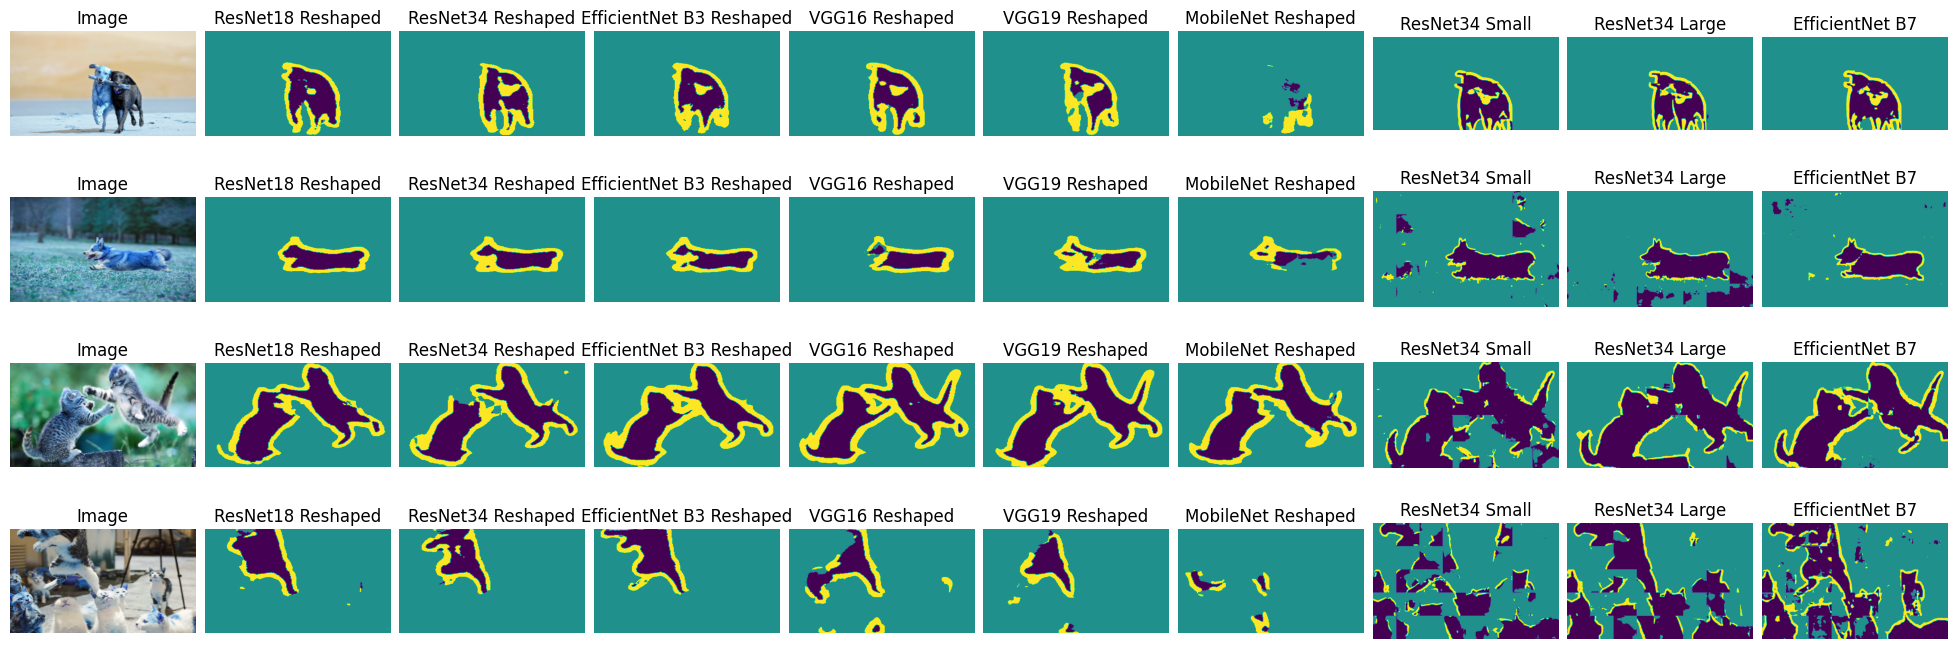

In [ ]:
# Create a 4-row, 7-column subplot grid with a fixed size
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(25, 8))

# Plotting the image on the LHS and the corroponding assembled predicted mask on the RHS!
for i in range(4):
  axes[i,0].imshow(cv2.resize(img_list[i], (1920,1080)))
  axes[i,0].set_title('Image')
  axes[i,0].axis('off')

  axes[i,1].imshow(predicted_masks_resnet18_reshape[i])
  axes[i,1].set_title('ResNet18 Reshaped')
  axes[i,1].axis('off')

  axes[i,2].imshow(predicted_masks_resnet34_reshape[i])
  axes[i,2].set_title('ResNet34 Reshaped')
  axes[i,2].axis('off')

  axes[i,3].imshow(effb3_reshape[i])
  axes[i,3].set_title('EfficientNet B3 Reshaped')
  axes[i,3].axis('off')

  axes[i,4].imshow(predicted_masks_vgg16[i])
  axes[i,4].set_title('VGG16 Reshaped')
  axes[i,4].axis('off')

  axes[i,5].imshow(predicted_masks_vgg19[i])
  axes[i,5].set_title('VGG19 Reshaped')
  axes[i,5].axis('off')

  axes[i,6].imshow(predicted_masks_mobilenet[i])
  axes[i,6].set_title('MobileNet Reshaped')
  axes[i,6].axis('off')

## ------------ Visualizing the outputs from the patch ------------ ##

  axes[i,7].imshow(predicted_masks_resnet34_small[i])
  axes[i,7].set_title('ResNet34 Small')
  axes[i,7].axis('off')

  axes[i,8].imshow(predicted_masks_resnet34_large[i])
  axes[i,8].set_title('ResNet34 Large')
  axes[i,8].axis('off')

  axes[i,9].imshow(predicted_masks_efb7[i])
  axes[i,9].set_title('EfficientNet B7')
  axes[i,9].axis('off')

# Adjust the size and spacing of the subplots
fig.subplots_adjust(hspace=0.4, wspace=0.05)

# Show the plot
plt.show()